In [1]:
import pandas as pd
import numpy  as np

from scipy.stats import  mannwhitneyu, ks_2samp

import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec


from pathlib import Path

import time

import pickle


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified

data_folder = "D:/analyze_Pearson_residuals/"

data_subfolder = "lupus"

data_path = Path ( data_folder + data_subfolder )


import sys
sys.path.append( data_folder )

from  nru_DE import *
from  plot_tab_utilities import *

In [3]:
# output plot
plot_jpg =  data_subfolder + "_Figure_7.jpg"

# output data
DE_stats_pkl = "DE_stats_SCT.pkl"


# input data - to calculate DE for SCTransform residuals
Pearson_residuals_pkl = "SCT_v2_Pearson_residuals_top_2000.pkl"   # Seurat output
clusters_pkl = "clusters.pkl"

# input data - Poisson model
DE_stats_Poisson_pkl = "DE_stats.pkl"
nru_dict_pkl =  "nru_dict.pkl"

# input data - SCTransform residual variance
S_g_pkl = "SCT_v2_residual_variance.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# path: output data
DE_stats_dsn = data_path / DE_stats_pkl


# paths: input data
Pearson_residuals__dsn = data_path / Pearson_residuals_pkl
clusters_dsn = data_path / clusters_pkl
DE_stats_Poisson_dsn = data_path / DE_stats_Poisson_pkl
nru_dict_dsn = data_path / nru_dict_pkl
S_g_dsn = data_path / S_g_pkl

In [4]:
def list_top_n_H_stats ( df_plot, stat,  rank, n_top ):  
  df_plot_top = df_plot.loc [ df_plot[rank]<= n_top ] 
  h_values_top_list = df_plot_top[stat].values.tolist()    
  return  h_values_top_list	    	
			
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]

In [5]:
df_clusters = pd.read_pickle ( clusters_dsn )	
print ( '\n\n df_clusters'  )
print ( df_clusters  )

print ( '\n\n df_clusters.value_counts' )
print ( df_clusters['Cluster'].value_counts() )


df_residuals = pd.read_pickle ( Pearson_residuals__dsn )
print ( '\n\n df_residuals'  )
print ( df_residuals  )



 df_clusters
                          Cluster
barcode                          
AAACATACAATGCC-1      CD4 T cells
AAACATACATTTCC-1  CD14+ Monocytes
AAACATACCAGAAA-1  CD14+ Monocytes
AAACATACCAGCTA-1  CD14+ Monocytes
AAACATACCATGCA-1      CD4 T cells
...                           ...
TTTGCATGCTAAGC-1      CD4 T cells
TTTGCATGGGACGA-1      CD4 T cells
TTTGCATGGTGAGG-1      CD4 T cells
TTTGCATGGTTTGG-1      CD4 T cells
TTTGCATGTCTTAC-1      CD4 T cells

[26820 rows x 1 columns]


 df_clusters.value_counts
CD4 T cells          11771
CD14+ Monocytes       5517
B cells               2735
CD8 T cells           2557
NK cells              2284
FCGR3A+ Monocytes     1489
Megakaryocytes         247
Dendritic cells        220
Name: Cluster, dtype: int64


 df_residuals
                 AAACATACAATGCC-1  AAACATACATTTCC-1  ...  TTTGCATGGTTTGG-1  \
ENSG00000244734         -0.493128         -0.543846  ...         -0.351042   
ENSG00000188536         -0.251546         -0.285823  ...         -0.13597

In [6]:
start_time = time.time()
df_DE_stats_SCT = DE_H_stats ( df_residuals, df_clusters ).rename ( columns={'H_stat':'SCT_H_stat'} )
end_time = time.time()
elapsed = end_time - start_time
print ( 'function DE_H_stats time: ',  f"{ elapsed:.1f}", ' seconds'  )

print ( '\n df_DE_stats_SCT' )
print ( df_DE_stats_SCT  )
print ( '\n\n df_DE_stats_SCT.describe' )
print ( df_DE_stats_SCT.describe ( percentiles=pctl_list ) )

function DE_H_stats time:  15.1  seconds

 df_DE_stats_SCT
                   SCT_H_stat  p_value
gene                                  
ENSG00000244734   5275.902677      0.0
ENSG00000188536   7833.432537      0.0
ENSG00000167996  13430.913163      0.0
ENSG00000206172   8224.301250      0.0
ENSG00000087086  16012.622625      0.0
...                       ...      ...
ENSG00000047249   4984.666192      0.0
ENSG00000213625   2525.214541      0.0
ENSG00000198839   5028.704372      0.0
ENSG00000028116   1899.896960      0.0
ENSG00000170142   3787.112708      0.0

[2000 rows x 2 columns]


 df_DE_stats_SCT.describe
         SCT_H_stat        p_value
count   2000.000000   2.000000e+03
mean    6406.250046   9.722024e-61
std     2366.724683   4.347815e-59
min      283.569724   0.000000e+00
1%       846.262131   0.000000e+00
5%      1655.865944   0.000000e+00
10%     2799.862425   0.000000e+00
25%     5155.255005   0.000000e+00
50%     6862.477932   0.000000e+00
75%     7894.616653   0.000000e

In [7]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_A_g = nru_dict['df_gene_stats'] [['A_g']]

df_S_g = pd.read_pickle ( S_g_dsn ).rename( columns={'residual_variance':'S_g'} )

df_gene_stats = pd.concat ( [ df_A_g, df_S_g ], axis=1 ) 
print ( '\n df_gene_stats' )
print ( df_gene_stats  )


 df_gene_stats
                        A_g        S_g
ENSG00000244734  583.983476  93.938289
ENSG00000188536  170.301545  82.880819
ENSG00000167996   94.267171   5.127709
ENSG00000206172   93.234056  73.096650
ENSG00000087086   82.854512  85.995300
...                     ...        ...
ENSG00000136492    0.612331   0.074043
ENSG00000253593    0.612331   0.057509
ENSG00000172379    0.612331   0.109099
ENSG00000226004    0.612331   0.086946
ENSG00000123643    0.612331   0.058429

[10619 rows x 2 columns]


In [8]:
df_DE_stats_nru = pd.read_pickle ( DE_stats_Poisson_dsn )[['H_stat']].rename ( columns={'H_stat':'nru_H_stat'} )
df_DE_stats_compare_methods = pd.concat ( [ df_DE_stats_nru, df_DE_stats_SCT[['SCT_H_stat']] ], axis=1 )
print ( '\n df_DE_stats_compare_methods' )
print ( df_DE_stats_compare_methods  )
print ( '\n\n df_DE_stats_compare_methods.describe' )
print ( df_DE_stats_compare_methods.describe ( percentiles=pctl_list ) )


 df_DE_stats_compare_methods
                  nru_H_stat   SCT_H_stat
gene                                     
ENSG00000188976  8109.056902  8109.165611
ENSG00000188290  1954.229387  1956.142885
ENSG00000187608   674.921319   772.408963
ENSG00000186891  9293.326120  9293.400738
ENSG00000186827  8467.938881  8468.218235
...                      ...          ...
ENSG00000047249          NaN  4984.666192
ENSG00000213625          NaN  2525.214541
ENSG00000198839          NaN  5028.704372
ENSG00000028116          NaN  1899.896960
ENSG00000170142          NaN  3787.112708

[2826 rows x 2 columns]


 df_DE_stats_compare_methods.describe
         nru_H_stat    SCT_H_stat
count   2000.000000   2000.000000
mean    7105.195362   6406.250046
std     2627.289100   2366.724683
min       95.856989    283.569724
1%       674.813295    846.262131
5%      1418.376609   1655.865944
10%     2431.863063   2799.862425
25%     5893.432200   5155.255005
50%     8220.004372   6862.477932
75%     8677.505442

In [9]:
df_analy_stats =  df_gene_stats.merge ( df_DE_stats_compare_methods, how='inner', left_index=True, right_index=True ) 
print ( '\n df_analy_stats' )
print ( df_analy_stats  )
print ( '\n\n df_analy_stats.describe' )
print ( df_analy_stats.describe ( percentiles=pctl_list ) )


 df_analy_stats
                        A_g        S_g    nru_H_stat    SCT_H_stat
ENSG00000244734  583.983476  93.938289   7937.054676   5275.902677
ENSG00000188536  170.301545  82.880819   8068.267267   7833.432537
ENSG00000167996   94.267171   5.127709  12953.841810  13430.913163
ENSG00000206172   93.234056  73.096650   8241.751255   8224.301250
ENSG00000087086   82.854512  85.995300  14554.752379  16012.622625
...                     ...        ...           ...           ...
ENSG00000047249    0.998958   1.119845           NaN   4984.666192
ENSG00000213625    0.992793   1.035647           NaN   2525.214541
ENSG00000198839    0.991411   1.150258           NaN   5028.704372
ENSG00000028116    0.964882   1.048508           NaN   1899.896960
ENSG00000170142    0.947197   1.032908           NaN   3787.112708

[2826 rows x 4 columns]


 df_analy_stats.describe
               A_g          S_g    nru_H_stat    SCT_H_stat
count  2826.000000  2826.000000   2000.000000   2000.000000
mean   

In [10]:
df_plot_both =  df_analy_stats.dropna() 
print ( '\n df_plot_both' )
print ( df_plot_both  )
print ( '\n\n df_plot_both.describe' )
print ( df_plot_both.describe ( percentiles=pctl_list ) )
print (  '\n\n df_plot_both.corr:' )
print (  df_plot_both.corr(method='spearman') )


 df_plot_both
                        A_g        S_g    nru_H_stat    SCT_H_stat
ENSG00000244734  583.983476  93.938289   7937.054676   5275.902677
ENSG00000188536  170.301545  82.880819   8068.267267   7833.432537
ENSG00000167996   94.267171   5.127709  12953.841810  13430.913163
ENSG00000206172   93.234056  73.096650   8241.751255   8224.301250
ENSG00000087086   82.854512  85.995300  14554.752379  16012.622625
...                     ...        ...           ...           ...
ENSG00000146109    1.232632   1.077920   6963.237282   6965.575599
ENSG00000159593    1.232611   1.135282   8514.619595   8514.591110
ENSG00000174718    1.232239   1.263417   6383.064949   6384.990907
ENSG00000155438    1.231812   1.108288   7824.465524   7825.458108
ENSG00000205981    1.231762   1.169084   8237.898265   8238.022097

[1174 rows x 4 columns]


 df_plot_both.describe
               A_g          S_g    nru_H_stat    SCT_H_stat
count  1174.000000  1174.000000   1174.000000   1174.000000
mean      2

In [11]:
df_plot_SCT = df_analy_stats[[  'SCT_H_stat', 'S_g' ]].dropna() 					  
df_plot_SCT.insert ( 2, 'rank_S_g', df_plot_SCT['S_g'].rank ( ascending=False ) )
df_plot_SCT.insert ( 3, 'rank_SCT_H_stat', df_plot_SCT['SCT_H_stat'].rank ( ascending=False ) )
                                                                           
print ( '\n df_plot_SCT' )
print ( df_plot_SCT  )


 df_plot_SCT
                   SCT_H_stat        S_g  rank_S_g  rank_SCT_H_stat
ENSG00000244734   5275.902677  93.938289       4.0           1474.0
ENSG00000188536   7833.432537  82.880819       6.0            533.0
ENSG00000167996  13430.913163   5.127709      52.0             14.0
ENSG00000206172   8224.301250  73.096650       8.0            361.0
ENSG00000087086  16012.622625  85.995300       5.0              3.0
...                       ...        ...       ...              ...
ENSG00000047249   4984.666192   1.119845    1201.0           1539.0
ENSG00000213625   2525.214541   1.035647    1876.0           1825.0
ENSG00000198839   5028.704372   1.150258    1017.0           1528.0
ENSG00000028116   1899.896960   1.048508    1757.0           1880.0
ENSG00000170142   3787.112708   1.032908    1897.0           1712.0

[2000 rows x 4 columns]


In [12]:
df_plot_nru = df_analy_stats[[ 'nru_H_stat', 'A_g' ]].dropna()  
df_plot_nru.insert ( 2, 'rank_A_g', df_plot_nru['A_g'].rank ( ascending=False ) )
df_plot_nru.insert ( 3, 'rank_nru_H_stat', df_plot_nru['nru_H_stat'].rank ( ascending=False ) )		 					  
					  
print ( '\n df_plot_nru' )
print ( df_plot_nru  )


 df_plot_nru
                   nru_H_stat         A_g  rank_A_g  rank_nru_H_stat
ENSG00000244734   7937.054676  583.983476       1.0           1119.0
ENSG00000188536   8068.267267  170.301545       2.0           1071.0
ENSG00000167996  12953.841810   94.267171       3.0             23.0
ENSG00000206172   8241.751255   93.234056       4.0            992.0
ENSG00000087086  14554.752379   82.854512       5.0              7.0
...                       ...         ...       ...              ...
ENSG00000213930   8642.041876    1.231873    1996.0            577.0
ENSG00000213949   8737.381982    1.231838    1997.0            325.0
ENSG00000155438   7824.465524    1.231812    1998.0           1160.0
ENSG00000112118   8606.082183    1.231794    1999.0            623.0
ENSG00000205981   8237.898265    1.231762    2000.0            996.0

[2000 rows x 4 columns]


In [13]:
df_SCT_quartiles_list = []
df_nru_quartlies_list = []

boxplot_DE_list = []
label_list = []

for group in range(10):
  n_top = 100 * ( 1 + group )

  h_values_SCT_top_list = list_top_n_H_stats ( df_plot_SCT, 'SCT_H_stat', 'rank_S_g', n_top )
  boxplot_DE_list.append ( h_values_SCT_top_list )
  df_SCT_H_stats = pd.DataFrame ( data = h_values_SCT_top_list, columns=[n_top] )
  df_quartiles = df_SCT_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_SCT_quartiles_list.append ( df_quartiles )
  
  h_values_nru_top_list = list_top_n_H_stats ( df_plot_nru, 'nru_H_stat', 'rank_A_g', n_top )
  boxplot_DE_list.append ( h_values_nru_top_list )
  df_nru_H_stats = pd.DataFrame ( data = h_values_nru_top_list, columns=[n_top] )
  df_quartiles = df_nru_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_nru_quartlies_list.append ( df_quartiles )
  
  label_list.extend (  [ str(n_top) + ' \n ' + '$S_g$',   str(n_top) + ' \n ' + '$A_g$', ] )

In [14]:
df_SCT_quartiles = pd.concat ( df_SCT_quartiles_list, axis=1, sort=False )
print ( '\n df_SCT_quartiles' )
print ( df_SCT_quartiles  )


 df_SCT_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean    7023.260359   6931.779713  ...   6681.413434   6670.286908
std     4360.927896   3932.776527  ...   2783.498868   2711.651663
min      310.794031    310.794031  ...    310.794031    310.794031
25%     3217.877738   3749.702274  ...   5154.176785   5286.854595
50%     6858.240880   7039.492645  ...   7245.344361   7209.092025
75%    10435.775144   9273.264031  ...   8316.783772   8278.930382
max    16888.526119  16888.526119  ...  16888.526119  16888.526119

[8 rows x 10 columns]


In [15]:
df_nru_quartiles = pd.concat ( df_nru_quartlies_list, axis=1, sort=False )
print ( '\n df_nru_quartiles' )
print ( df_nru_quartiles  )


 df_nru_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean    7923.785138   7651.270719  ...   6726.889681   6773.152939
std     4871.094132   4289.976444  ...   3209.330941   3125.559425
min      320.621481    320.621481  ...     95.856989     95.856989
25%     2991.472818   4071.963659  ...   4340.613394   4484.367458
50%     8155.009261   8338.226539  ...   7801.099653   7927.929754
75%    12637.212062  11108.279562  ...   8753.308208   8740.915482
max    16524.491543  16524.491543  ...  16524.491543  16524.491543

[8 rows x 10 columns]


In [16]:
# compare distributions of H-statistics for genes with highest scores

tuple_list = []

for group in range(10):
  n = 100 * ( 1 + group ) 
  n_SCT = 2 * group
  n_nru = 1 + n_SCT
  list_SCT = boxplot_DE_list[ n_SCT ]
  list_nru = boxplot_DE_list [ n_nru ]

  MW_stat, MW_pv = mannwhitneyu( list_nru, list_SCT, alternative='greater' )     
  KS_stat_2_sided, KS_pv_2_sided = ks_2samp( list_nru, list_SCT, alternative='two-sided' )   
  KS_stat_less, KS_pv_less = ks_2samp( list_nru, list_SCT, alternative='less' )    
  KS_stat_greater, KS_pv_greater = ks_2samp( list_nru, list_SCT, alternative='greater' )   
  
  tuple_list.append ( ( n , MW_stat, MW_pv, KS_stat_2_sided, KS_pv_2_sided, KS_stat_less, KS_pv_less, KS_stat_greater, KS_pv_greater ) )  
  
column_list = ['genes', 'MW_stat', 'MW_pv', 'KS_stat_2_sided', 'KS_pv_2_sided', 'KS_stat_less', 'KS_pv_less', 'KS_stat_greater', 'KS_pv_greater' ] 
df_DE_stats = pd.DataFrame ( data = tuple_list, columns= column_list ).set_index ( ['genes'] )


pd.set_option('display.max_columns', 8)
 
print ( '\n df_DE_stats' )
print ( df_DE_stats  )

pd.set_option('display.max_columns', 5)


 df_DE_stats
        MW_stat     MW_pv  KS_stat_2_sided  KS_pv_2_sided  KS_stat_less  \
genes                                                                     
100      5573.0  0.080930         0.170000   1.111953e-01      0.170000   
200     22170.0  0.030293         0.155000   1.625846e-02      0.155000   
300     50505.0  0.004761         0.140000   5.536865e-03      0.140000   
400     86978.0  0.016377         0.122500   4.907932e-03      0.122500   
500    131223.0  0.086504         0.132000   3.237472e-04      0.132000   
600    187703.0  0.099708         0.150000   2.635159e-06      0.150000   
700    257808.0  0.045198         0.167143   5.946318e-09      0.167143   
800    338395.0  0.023260         0.172500   8.266365e-11      0.172500   
900    438129.0  0.001329         0.188889   1.901530e-14      0.188889   
1000   552639.0  0.000023         0.213000   2.856558e-20      0.213000   

         KS_pv_less  KS_stat_greater  KS_pv_greater  
genes                          

In [17]:
# for genes with highest scores for each method, compute Speraman correlation of scores with H-statistics

corr_tuple_list = []

top_rank_list = [50, 100, 200, 500, 1000, 2000]

for top_rank in top_rank_list:
  df_SCT_top_rank = df_plot_SCT.loc [ df_plot_SCT['rank_SCT_H_stat'] <= top_rank ].sort_values ( ['rank_SCT_H_stat'] )
  df_corr = df_SCT_top_rank[['SCT_H_stat', 'S_g']].corr ( method='spearman' )
  SCT_corr = df_corr.at['SCT_H_stat','S_g']
 
  df_nru_top_rank = df_plot_nru.loc [ df_plot_nru['rank_nru_H_stat'] <= top_rank ].sort_values ( ['rank_nru_H_stat'] )
  df_corr = df_nru_top_rank[[ 'nru_H_stat', 'A_g']].corr ( method='spearman' )
  nru_corr = df_corr.at['nru_H_stat', 'A_g'] 
  
  corr_tuple_list.append ( ( top_rank, SCT_corr, nru_corr ) ) 
  
  
df_corr_compare = pd.DataFrame ( data = corr_tuple_list, columns=[ 'genes', 'S_g', 'A_g' ] ).set_index ( ['genes'] )
print ( '\n Table \n Spearman correlations of H-statistics with S_g and A_g \n for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics \n' )
print ( df_corr_compare  )


 Table 
 Spearman correlations of H-statistics with S_g and A_g 
 for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics 

            S_g       A_g
genes                    
50     0.513277  0.384970
100    0.336910  0.695986
200    0.503348  0.858743
500    0.458266  0.754645
1000   0.369304  0.446222
2000   0.160180 -0.047764


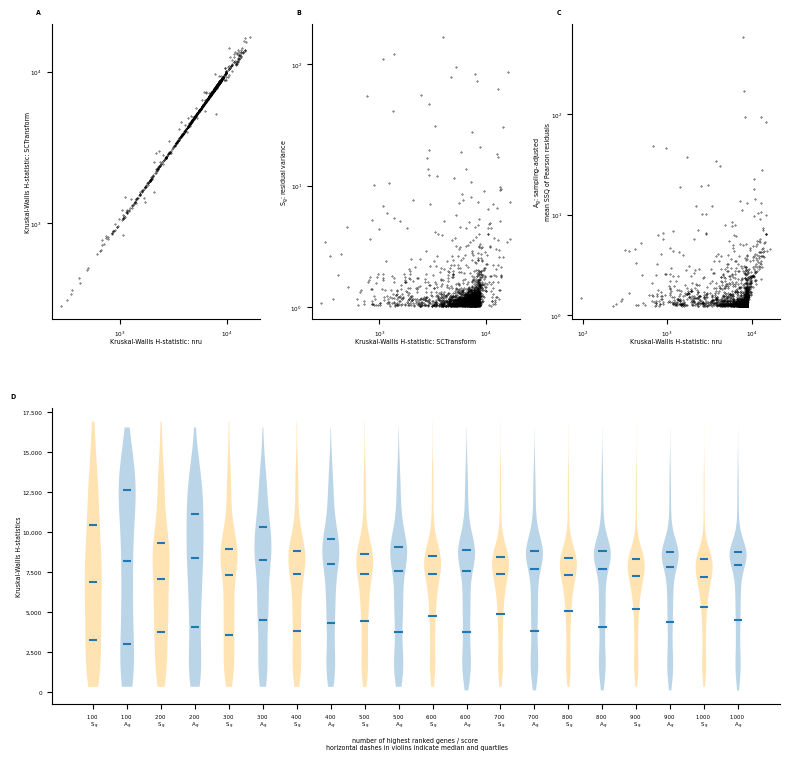

In [18]:
fig = plt.figure( figsize=( 8, 8 ) )

gs = GridSpec( 2, 3  )

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

######

ax1.scatter ( df_plot_both[ 'nru_H_stat' ],df_plot_both['SCT_H_stat'], marker='o', color='k',  s=0.1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel ( 'Kruskal-Wallis H-statistic: nru', fontsize=4.5, labelpad=-0.20 )	  
ax1.set_ylabel ( 'Kruskal-Wallis H-statistic: SCTransform',fontsize=4.5, labelpad=-0.20 )
ax1.tick_params(labelsize=4.1, which='major' )    
ax1.minorticks_off()
	
right = ax1.spines["right"]	
right.set_visible(False)
top = ax1.spines["top"]	
top.set_visible(False)

ax1.text(-0.05, 1.05, 'A', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax1.transAxes,)



ax2.scatter ( df_plot_SCT[ 'SCT_H_stat' ],df_plot_SCT['S_g'], marker='o', color='k',  s=0.1)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel ( 'Kruskal-Wallis H-statistic: SCTransform',fontsize=4.5, labelpad=-0.20 )	
ax2.set_ylabel ( '$S_g$: residual variance', fontsize=4.5, labelpad=-0.20 )	  
ax2.tick_params(labelsize=4.1, which='major' )    
ax2.minorticks_off()
	
right = ax2.spines["right"]	
right.set_visible(False)
top = ax2.spines["top"]	
top.set_visible(False)

ax2.text(-0.05, 1.05, 'B', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax2.transAxes,)



ax3.scatter ( df_plot_nru[ 'nru_H_stat' ],df_plot_nru['A_g'] , marker='o', color='k',  s=0.1)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel ( 'Kruskal-Wallis H-statistic: nru',fontsize=4.5, labelpad=-0.20 )	
ax3.set_ylabel ( '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', fontsize=4.5, labelpad=-0.20 )	  
ax3.tick_params(labelsize=4.1, which='major' )    
ax3.minorticks_off()
	
right = ax3.spines["right"]	
right.set_visible(False)
top = ax3.spines["top"]	
top.set_visible(False)

ax3.text(-0.05, 1.05, 'C', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax3.transAxes,)
 


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params) 
 
n_groups = len ( boxplot_DE_list ) 
 
violin_parts = ax4.violinplot( boxplot_DE_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] )

for i_sct in range ( n_groups // 2 ):
  pc = violin_parts['bodies'][2*i_sct]
  pc.set_facecolor('orange')


ax4.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

ax4.tick_params(labelsize=4.1)   
ax4.set_xticklabels( label_list, fontsize=3.9 )  

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.set_xlabel ( '\n number of highest ranked genes / score  \n horizontal dashes in violins indicate median and quartiles', fontsize=4.5, labelpad=-0.0 )
ax4.set_ylabel ( 'Kruskal-Wallis H-statistics',fontsize=4.5, labelpad=-0.20 )	
  
	
right = ax4.spines["right"]	
right.set_visible(False)
top = ax4.spines["top"]	
top.set_visible(False)
  
ax4.text(-0.05, 1.05, 'D', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax4.transAxes,) 
      


plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )
  
plt.savefig( plot_dsn, transparent=True, dpi=300 ) 

In [19]:
df_DE_stats_SCT.to_pickle ( DE_stats_dsn )